### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### 1. Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# path folder
path = r'C:\Users\alexp\UFC Stats'
path

'C:\\Users\\alexp\\UFC Stats'

In [4]:
# import clean UFC data
df_ufc_4 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_ufc_clean_v4.csv'), index_col = 0)

In [5]:
df_ufc_4.head(20)

,red_fighter,blue_fighter,date,location,winner,title_bout,weight_class,B_avg_KD,B_avg_SIG_STR_pct,B_avg_TD_pct,...,R_Reach_cms,R_Weight_lbs,B_age,R_age,country,method,number_of_rounds,last_round_time,round,winner_of_bout
0,Adrian Yanez,Gustavo Lopez,3/20/2021,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000000,0.420000,0.330000,...,177.80,135,31,27,United States of America,KO/TKO,3,0:27,3 Rnd (5-5-5),Adrian Yanez
1,Trevin Giles,Roman Dolidze,3/20/2021,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500000,0.660000,0.300000,...,187.96,185,32,28,United States of America,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Trevin Giles
2,Tai Tuivasa,Harry Hunsucker,3/20/2021,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,NaN,...,190.50,264,32,28,United States of America,KO/TKO,1,0:49,3 Rnd (5-5-5),Tai Tuivasa
3,Cheyanne Buys,Montserrat Conejo,3/20/2021,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,NaN,...,160.02,115,28,25,United States of America,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Montserrat Conejo
4,Marion Reneau,Macy Chiasson,3/20/2021,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125000,0.535625,0.185000,...,172.72,135,29,43,United States of America,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Macy Chiasson
5,Leonardo Santos,Grant Dawson,3/20/2021,"Las Vegas, Nevada, USA",Blue,False,Lightweight,0.000000,0.515000,0.435000,...,190.50,155,27,41,United States of America,KO/TKO,3,4:59,3 Rnd (5-5-5),Grant Dawson
6,Song Kenan,Max Griffin,3/20/2021,"Las Vegas, Nevada, USA",Blue,False,Welterweight,0.046875,0.459277,0.322188,...,180.34,170,35,31,United States of America,KO/TKO,1,2:20,3 Rnd (5-5-5),Max Griffin
7,Derek Brunson,Kevin Holland,3/20/2021,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.156250,0.791582,0.269199,...,195.58,185,28,37,United States of America,Decision - Unanimous,5,5:00,5 Rnd (5-5-5-5-5),Derek Brunson
8,Montel Jackson,Jesse Strader,3/20/2021,"Las Vegas, Nevada, USA",Red,False,Bantamweight,NaN,NaN,NaN,...,190.50,135,29,28,United States of America,KO/TKO,1,1:58,3 Rnd (5-5-5),Montel Jackson
9,Bruno Silva,JP Buys,3/20/2021,"Las Vegas, Nevada, USA",Red,False,Flyweight,NaN,NaN,NaN,...,NaN,185,24,31,United States of America,KO/TKO,2,2:56,3 Rnd (5-5-5),Bruno Silva


In [6]:
df_ufc_4.shape

(6012, 99)

K-means algorithm can only handle numerical variables, so we will need to remove any categorical columns from the data.

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
# drop categorical variables
df_ufc_4 = df_ufc_4.drop(columns = ['red_fighter', 'blue_fighter', 'date', 'location', 'winner', 'title_bout', 'weight_class', 'B_Stance', 'R_Stance', 'country', 'method', 'last_round_time', 'round', 'winner_of_bout'])

In [9]:
df_ufc_4.head(20)

,B_avg_KD,B_avg_SIG_STR_pct,B_avg_TD_pct,B_avg_SUB_ATT,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_SIG_STR_pct,R_avg_TD_pct,R_avg_SUB_ATT,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,number_of_rounds
0,0.000000,0.420000,0.330000,0.500000,0.000000,50.000000,20.000000,76.500000,41.000000,1.500000,1.000000,39.500000,11.000000,7.500000,7.000000,3.000000,2.000000,35.000000,12.500000,10.500000,4.500000,4.500000,3.000000,531.500000,4,0,0,1,1,1,1,0,0,0,0,0,1,0,165.10,170.18,135,1.000000,0.500000,0.000000,0.000000,0.000000,34.000000,17.000000,35.000000,18.000000,0.000000,0.000000,32.000000,15.000000,2.000000,2.000000,0.000000,0.000000,33.000000,16.000000,1.000000,1.000000,0.000000,0.000000,166.000000,1,0,1,0,1,1,0,0,0,0,0,1,0,0,170.18,177.80,135,31,27,3
1,0.500000,0.660000,0.300000,1.500000,0.000000,65.500000,35.000000,113.500000,68.500000,2.500000,1.500000,46.000000,20.000000,12.000000,8.000000,7.500000,7.000000,58.000000,30.000000,0.500000,0.500000,7.000000,4.500000,577.500000,4,0,2,0,2,2,0,0,0,1,0,1,0,0,187.96,193.04,205,1.031250,0.576875,0.406250,0.250000,0.375000,77.562500,43.156250,93.125000,57.218750,1.281250,0.781250,71.093750,38.062500,4.687500,3.312500,1.781250,1.781250,58.312500,30.437500,6.968750,3.656250,12.281250,9.062500,747.343750,17,0,2,0,2,4,2,0,0,1,0,3,0,0,182.88,187.96,185,32,28,3
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,187.96,190.50,241,0.546875,0.538906,0.000000,0.000000,0.000000,59.234375,30.375000,70.500000,41.390625,0.031250,0.000000,42.500000,16.781250,5.781250,4.546875,10.953125,9.046875,45.875000,20.281250,11.328125,8.562500,2.031250,1.531250,448.203125,13,0,3,0,3,4,3,0,0,0,1,3,0,0,187.96,190.50,264,32,28,1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,152.40,154.94,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,160.02,160.02,115,28,25,3
4,0.125000,0.535625,0.185000,0.125000,0.250000,109.187500,57.937500,170.437500,105.625000,5.375000,1.500000,77.375000,31.375000,31.187500,26.187500,0.625000,0.375000,33.562500,11.000000,39.062500,28.812500,36.562500,18.125000,764.000000,11,1,3,0,3,4,1,0,0,0,1,2,1,0,180.34,182.88,135,0.000000,0.403076,0.511719,0.231445,0.031250,109.331055,44.362305,137.154297,70.198242,2.261719,1.261719,86.375000,26.030273,17.272461,13.469727,5.683594,4.862305,85.845703,27.907227,18.996094,13.970703,4.489258,2.484375,874.380859,30,0,2,0,2,5,6,0,0,0,1,2,2,0,167.64,172.72,135,29,43,3
5,0.000000,0.515000,0.435000,1.250000,0.000000,86.000000,40.750000,150.625000,93.500000,6.375000,2.625000,60.62

In [10]:
df_ufc_4.shape

(6012, 85)

### 2. Elbow Technique

#### Elbow Technique cannot contain NaN values, so it is recommended to impute the NaN values with the median. 

In [11]:
# impute NaN values with the median for elbow technique
df_ufc_4 = df_ufc_4.fillna(df_ufc_4.median())

In [12]:
df_ufc_4.head(20)

,B_avg_KD,B_avg_SIG_STR_pct,B_avg_TD_pct,B_avg_SUB_ATT,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_SIG_STR_pct,R_avg_TD_pct,R_avg_SUB_ATT,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,number_of_rounds
0,0.000000,0.420000,0.330000,0.500000,0.000000,50.000000,20.000000,76.500000,41.000000,1.500000,1.000000,39.500000,11.000000,7.500000,7.000000,3.000000,2.000000,35.000000,12.500000,10.500000,4.500000,4.500000,3.000000,531.500000,4,0,0,1,1,1,1,0,0,0,0,0,1,0,165.10,170.18,135,1.000000,0.500000,0.000000,0.000000,0.000000,34.000000,17.000000,35.000000,18.000000,0.000000,0.000000,32.000000,15.000000,2.000000,2.000000,0.000000,0.000000,33.000000,16.000000,1.000000,1.000000,0.000000,0.000000,166.000000,1,0,1,0,1,1,0,0,0,0,0,1,0,0,170.18,177.80,135,31,27,3
1,0.500000,0.660000,0.300000,1.500000,0.000000,65.500000,35.000000,113.500000,68.500000,2.500000,1.500000,46.000000,20.000000,12.000000,8.000000,7.500000,7.000000,58.000000,30.000000,0.500000,0.500000,7.000000,4.500000,577.500000,4,0,2,0,2,2,0,0,0,1,0,1,0,0,187.96,193.04,205,1.031250,0.576875,0.406250,0.250000,0.375000,77.562500,43.156250,93.125000,57.218750,1.281250,0.781250,71.093750,38.062500,4.687500,3.312500,1.781250,1.781250,58.312500,30.437500,6.968750,3.656250,12.281250,9.062500,747.343750,17,0,2,0,2,4,2,0,0,1,0,3,0,0,182.88,187.96,185,32,28,3
2,0.015625,0.450000,0.250000,0.148468,0.000000,66.500000,29.687500,89.750000,48.000000,2.000000,0.750000,51.187500,18.335938,7.500000,5.076477,4.500000,3.625000,48.687500,17.000000,5.750000,3.750000,5.062500,3.500000,638.500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,187.96,190.50,241,0.546875,0.538906,0.000000,0.000000,0.000000,59.234375,30.375000,70.500000,41.390625,0.031250,0.000000,42.500000,16.781250,5.781250,4.546875,10.953125,9.046875,45.875000,20.281250,11.328125,8.562500,2.031250,1.531250,448.203125,13,0,3,0,3,4,3,0,0,0,1,3,0,0,187.96,190.50,264,32,28,1
3,0.015625,0.450000,0.250000,0.148468,0.000000,66.500000,29.687500,89.750000,48.000000,2.000000,0.750000,51.187500,18.335938,7.500000,5.076477,4.500000,3.625000,48.687500,17.000000,5.750000,3.750000,5.062500,3.500000,638.500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,152.40,154.94,115,0.047168,0.450000,0.250000,0.187500,0.000000,69.500000,30.500000,94.000000,48.544922,2.000000,0.812500,54.000000,19.015137,7.917969,5.430634,4.780975,3.937378,51.025391,18.400864,5.750000,3.750000,5.375000,3.687500,655.844101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,160.02,160.02,115,28,25,3
4,0.125000,0.535625,0.185000,0.125000,0.250000,109.187500,57.937500,170.437500,105.625000,5.375000,1.500000,77.375000,31.375000,31.187500,26.187500,0.625000,0.375000,33.562500,11.000000,39.062500,28.812500,36.562500,18.125000,764.000000,11,1,3,0,3,4,1,0,0,0,1,2,1,0,180.34,182.88,135,0.000000

In [13]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [14]:
score = [kmeans[i].fit(df_ufc_4).score(df_ufc_4) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.
score

[-840248677.1587017,
 -573053826.0517277,
 -421606383.13512516,
 -351930063.1219553,
 -300552447.7051233,
 -260406026.54819953,
 -232917626.47054228,
 -214089905.0726336,
 -201067755.7154919]

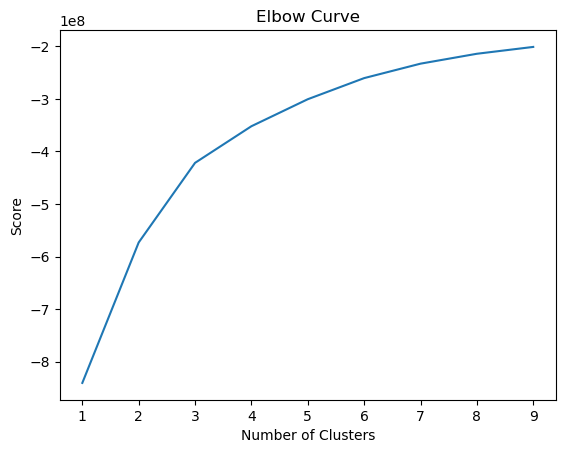

In [15]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The elbow jumps slightly from two to three on the x-axis, but after that, the curve straightens out. The optimal count for these clusters is three.

### 3. k-Means Clustering

In [16]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3, n_init = 10)

In [17]:
# Fit the k-means object to the data.
kmeans.fit(df_ufc_4)

KMeans(n_clusters=3)

In [18]:
df_ufc_4['clusters'] = kmeans.fit_predict(df_ufc_4)

In [19]:
df_ufc_4.head()

,B_avg_KD,B_avg_SIG_STR_pct,B_avg_TD_pct,B_avg_SUB_ATT,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_SIG_STR_pct,R_avg_TD_pct,R_avg_SUB_ATT,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,number_of_rounds,clusters
0,0.000000,0.420000,0.330,0.500000,0.00,50.0000,20.0000,76.5000,41.000,1.500,1.00,39.5000,11.000000,7.5000,7.000000,3.000,2.000,35.0000,12.5,10.5000,4.5000,4.5000,3.000,531.5,4,0,0,1,1,1,1,0,0,0,0,0,1,0,165.10,170.18,135,1.000000,0.500000,0.000000,0.000000,0.00000,34.000000,17.000000,35.000000,18.000000,0.000000,0.000000,32.00000,15.000000,2.000000,2.000000,0.000000,0.000000,33.000000,16.000000,1.000000,1.000000,0.000000,0.000000,166.000000,1,0,1,0,1,1,0,0,0,0,0,1,0,0,170.18,177.80,135,31,27,3,2
1,0.500000,0.660000,0.300,1.500000,0.00,65.5000,35.0000,113.5000,68.500,2.500,1.50,46.0000,20.000000,12.0000,8.000000,7.500,7.000,58.0000,30.0,0.5000,0.5000,7.0000,4.500,577.5,4,0,2,0,2,2,0,0,0,1,0,1,0,0,187.96,193.04,205,1.031250,0.576875,0.406250,0.250000,0.37500,77.562500,43.156250,93.125000,57.218750,1.281250,0.781250,71.09375,38.062500,4.687500,3.312500,1.781250,1.781250,58.312500,30.437500,6.968750,3.656250,12.281250,9.062500,747.343750,17,0,2,0,2,4,2,0,0,1,0,3,0,0,182.88,187.96,185,32,28,3,0
2,0.015625,0.450000,0.250,0.148468,0.00,66.5000,29.6875,89.7500,48.000,2.000,0.75,51.1875,18.335938,7.5000,5.076477,4.500,3.625,48.6875,17.0,5.7500,3.7500,5.0625,3.500,638.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,187.96,190.50,241,0.546875,0.538906,0.000000,0.000000,0.00000,59.234375,30.375000,70.500000,41.390625,0.031250,0.000000,42.50000,16.781250,5.781250,4.546875,10.953125,9.046875,45.875000,20.281250,11.328125,8.562500,2.031250,1.531250,448.203125,13,0,3,0,3,4,3,0,0,0,1,3,0,0,187.96,190.50,264,32,28,1,2
3,0.015625,0.450000,0.250,0.148468,0.00,66.5000,29.6875,89.7500,48.000,2.000,0.75,51.1875,18.335938,7.5000,5.076477,4.500,3.625,48.6875,17.0,5.7500,3.7500,5.0625,3.500,638.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,152.40,154.94,115,0.047168,0.450000,0.250000,0.187500,0.00000,69.500000,30.500000,94.000000,48.544922,2.000000,0.812500,54.00000,19.015137,7.917969,5.430634,4.780975,3.937378,51.025391,18.400864,5.750000,3.750000,5.375000,3.687500,655.844101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,160.02,160.02,115,28,25,3,0
4,0.125000,0.535625,0.185,0.125000,0.25,109.1875,57.9375,170.4375,105.625,5.375,1.50,77.3750,31.375000,31.1875,26.187500,0.625,0.375,33.5625,11.0,39.0625,28.8125,36.5625,18.125,764.0,11,1,3,0,3,4,1,0,0,0,1,2,1,0,180.34,182.88,135,0.000000,0.403076,0.511719,0.231445,0.03125,109.331055,44.362305,137.154297,70.198242,2.261719,1.261719,86.37500,26.030273,17.272461,13.469727,5.683594,4.862305,85.845703,27.907227,18.996094,13.970703,4.489258,2.484375,874.380859,30,0,2,0,2,5,6,0,0,0,1,2,2,0,167.64,172

In [20]:
df_ufc_4['clusters'].value_counts()

0    3095
2    1654
1    1263
Name: clusters, dtype: int64

In [40]:
# Export df_ufc dataframe in "Prepared Data"
df_ufc_4.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_ufc_clusters.csv'))

In [21]:
df_ufc_4.loc[df_ufc_4['clusters'] == 2, 'cluster'] = 'dark purple'
df_ufc_4.loc[df_ufc_4['clusters'] == 1, 'cluster'] = 'purple'
df_ufc_4.loc[df_ufc_4['clusters'] == 0, 'cluster'] = 'pink'

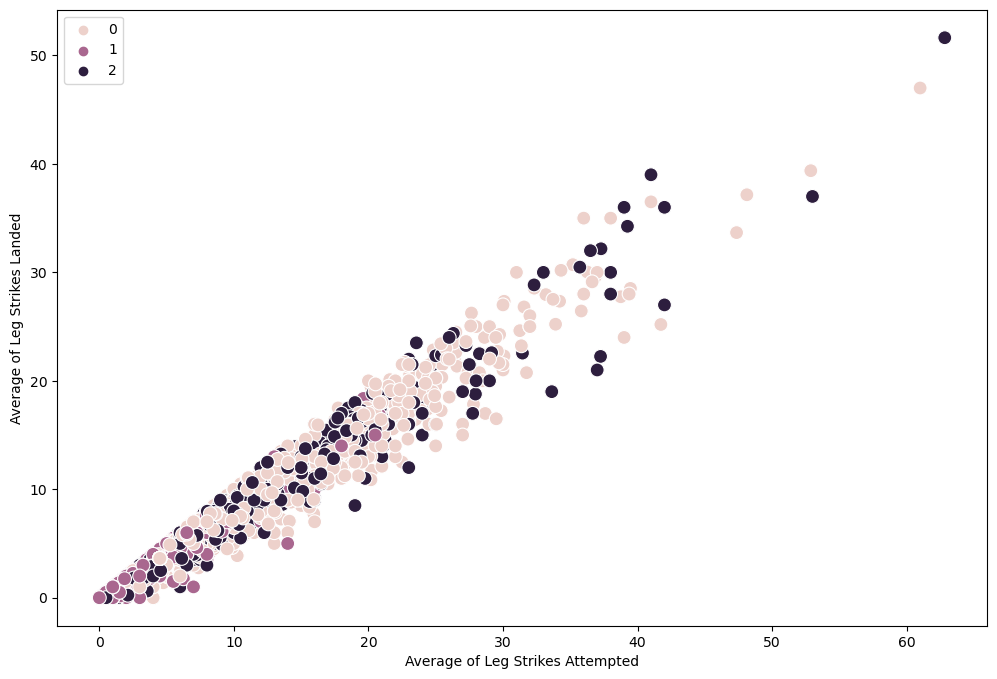

In [28]:
# Plot the clusters for the "B_avg_LEG_att" and "B_avg_LEG_landed" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_ufc_4['B_avg_LEG_att'], y=df_ufc_4['B_avg_LEG_landed'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Average of Leg Strikes Attempted') # Label x-axis.
plt.ylabel('Average of Leg Strikes Landed') # Label y-axis.
plt.show()

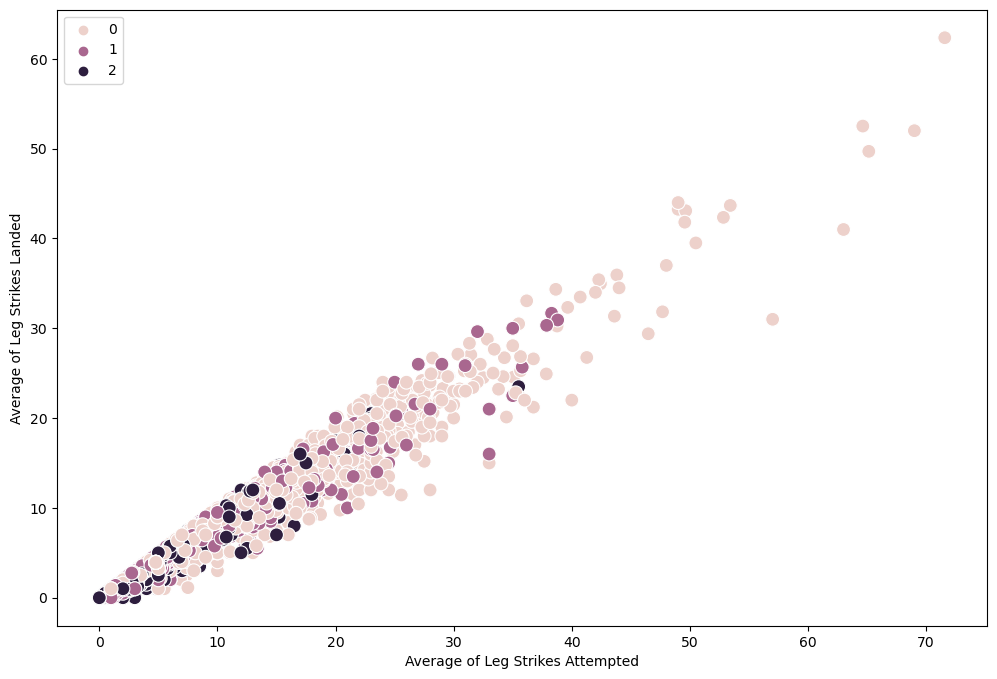

In [29]:
# Plot the clusters for the "R_avg_LEG_att" and "R_avg_LEG_landed" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_ufc_4['R_avg_LEG_att'], y=df_ufc_4['R_avg_LEG_landed'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Average of Leg Strikes Attempted') # Label x-axis.
plt.ylabel('Average of Leg Strikes Landed') # Label y-axis.
plt.show()

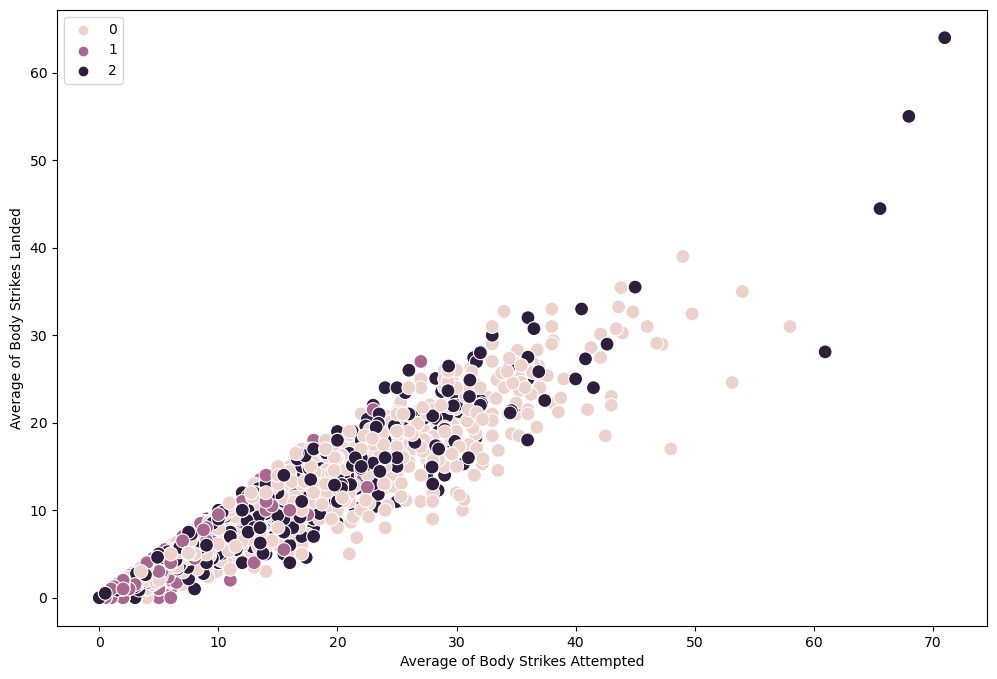

In [33]:
# Plot the clusters for the "B_avg_BODY_att" and "B_avg_BODY_landed" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_ufc_4['B_avg_BODY_att'], y=df_ufc_4['B_avg_BODY_landed'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Average of Body Strikes Attempted') # Label x-axis.
plt.ylabel('Average of Body Strikes Landed') # Label y-axis.
plt.show()

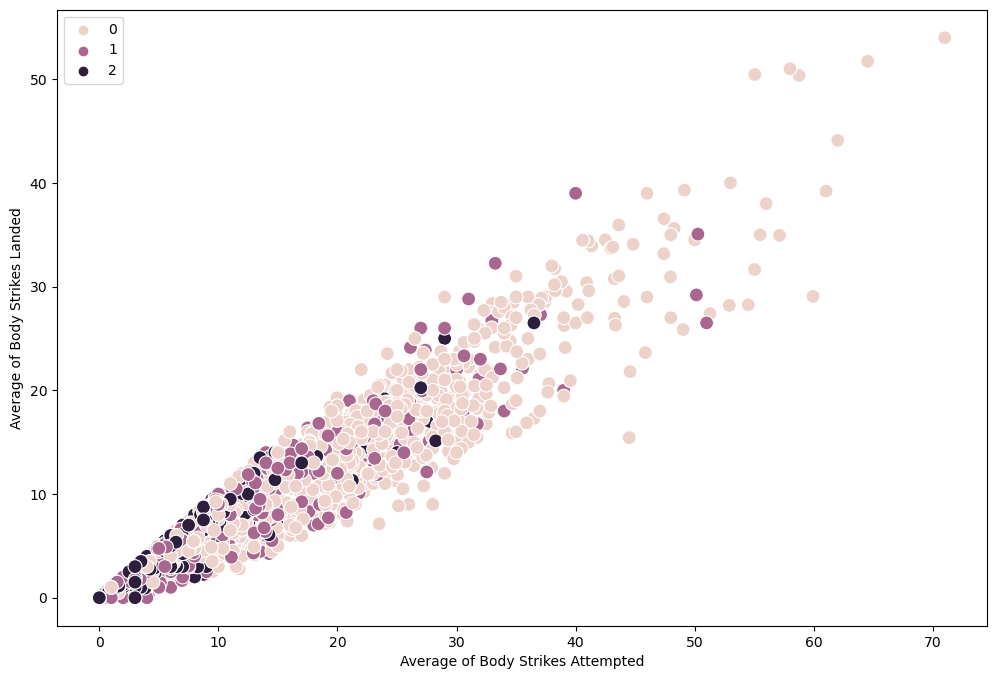

In [34]:
# Plot the clusters for the "R_avg_BODY_att" and "R_avg_BODY_landed" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_ufc_4['R_avg_BODY_att'], y=df_ufc_4['R_avg_BODY_landed'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Average of Body Strikes Attempted') # Label x-axis.
plt.ylabel('Average of Body Strikes Landed') # Label y-axis.
plt.show()

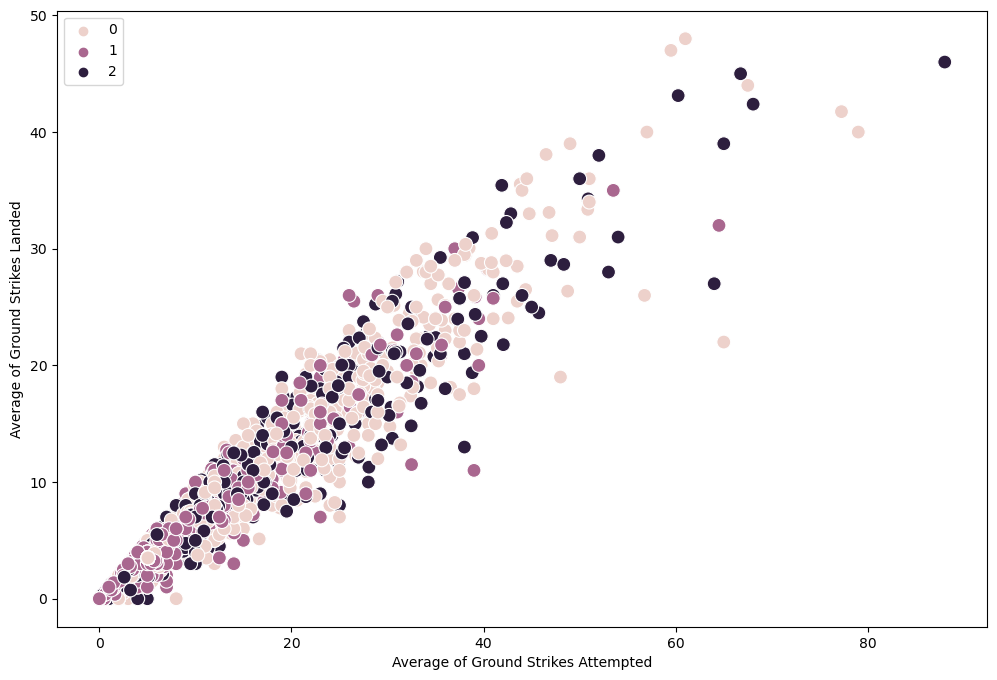

In [35]:
# Plot the clusters for the "B_avg_GROUND_att" and "B_avg_GROUND_landed" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_ufc_4['B_avg_GROUND_att'], y=df_ufc_4['B_avg_GROUND_landed'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Average of Ground Strikes Attempted') # Label x-axis.
plt.ylabel('Average of Ground Strikes Landed') # Label y-axis.
plt.show()

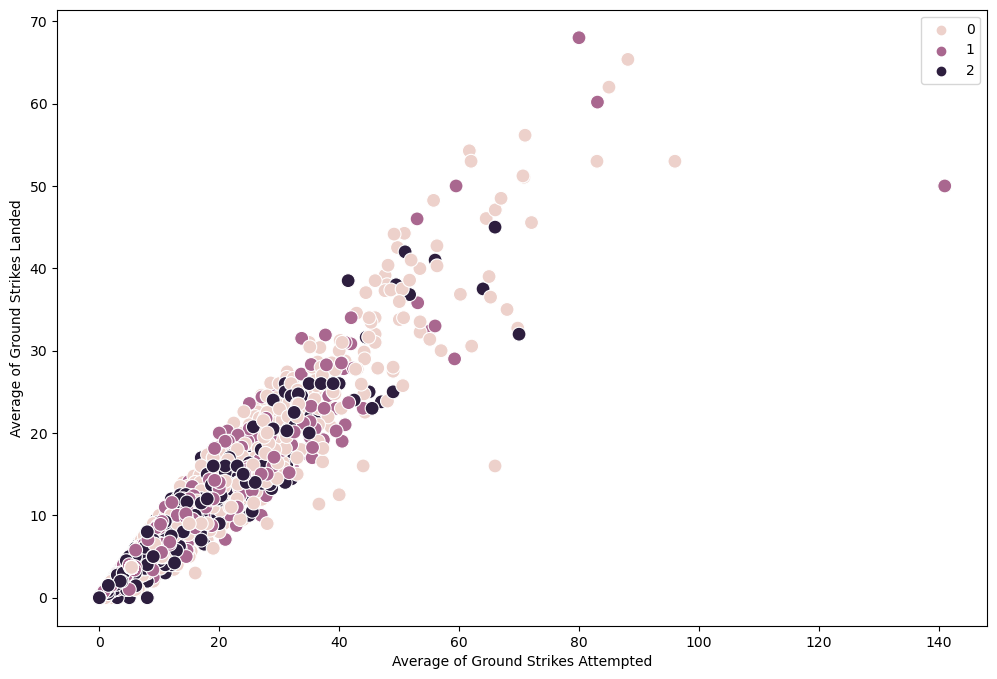

In [32]:
# Plot the clusters for the "R_avg_GROUND_att" and "R_avg_GROUND_landed" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_ufc_4['R_avg_GROUND_att'], y=df_ufc_4['R_avg_GROUND_landed'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Average of Ground Strikes Attempted') # Label x-axis.
plt.ylabel('Average of Ground Strikes Landed') # Label y-axis.
plt.show()

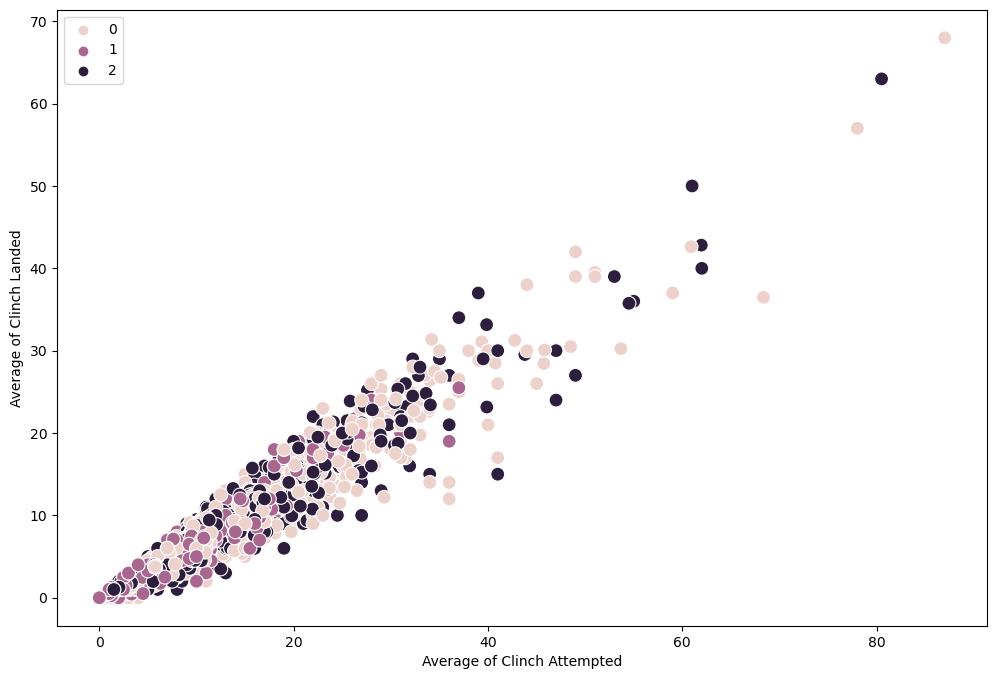

In [36]:
# Plot the clusters for the "B_avg_CLINCH_att" and "B_avg_CLINCH_landed" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_ufc_4['B_avg_CLINCH_att'], y=df_ufc_4['B_avg_CLINCH_landed'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Average of Clinch Attempted') # Label x-axis.
plt.ylabel('Average of Clinch Landed') # Label y-axis.
plt.show()

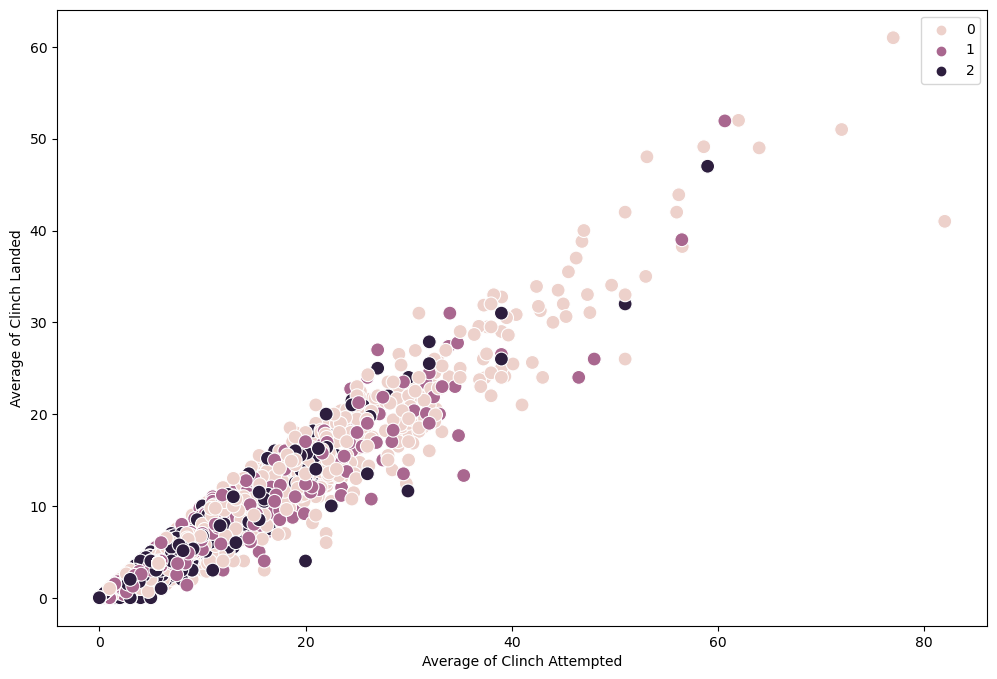

In [37]:
# Plot the clusters for the "R_avg_CLINCH_att" and "R_avg_CLINCH_landed" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_ufc_4['R_avg_CLINCH_att'], y=df_ufc_4['R_avg_CLINCH_landed'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Average of Clinch Attempted') # Label x-axis.
plt.ylabel('Average of Clinch Landed') # Label y-axis.
plt.show()

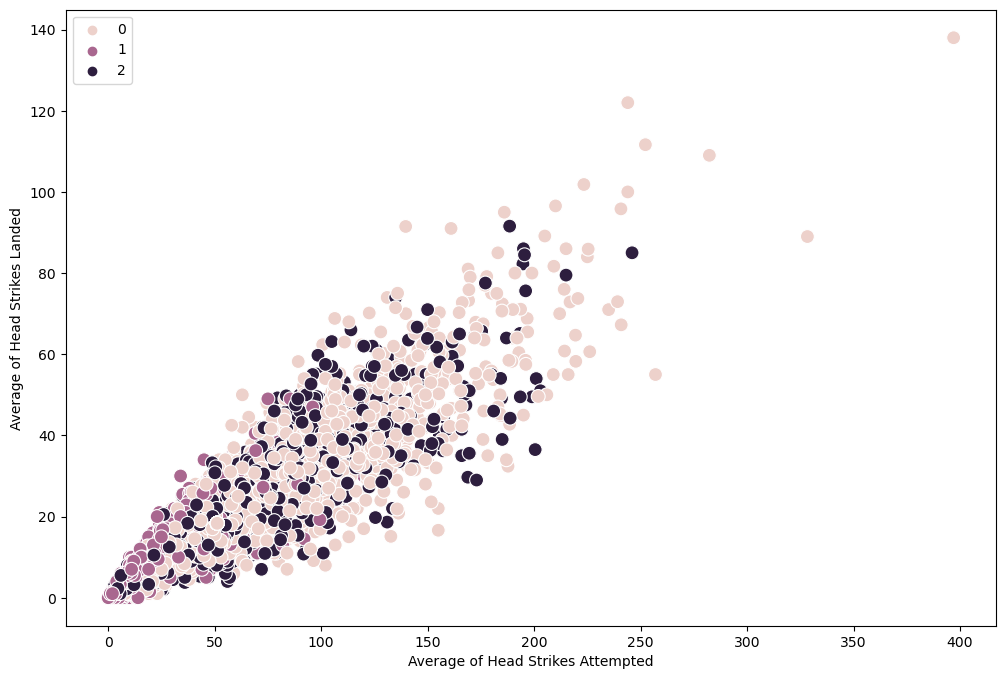

In [38]:
# Plot the clusters for the "B_avg_HEAD_att" and "B_avg_HEAD_landed" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_ufc_4['B_avg_HEAD_att'], y=df_ufc_4['B_avg_HEAD_landed'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Average of Head Strikes Attempted') # Label x-axis.
plt.ylabel('Average of Head Strikes Landed') # Label y-axis.
plt.show()

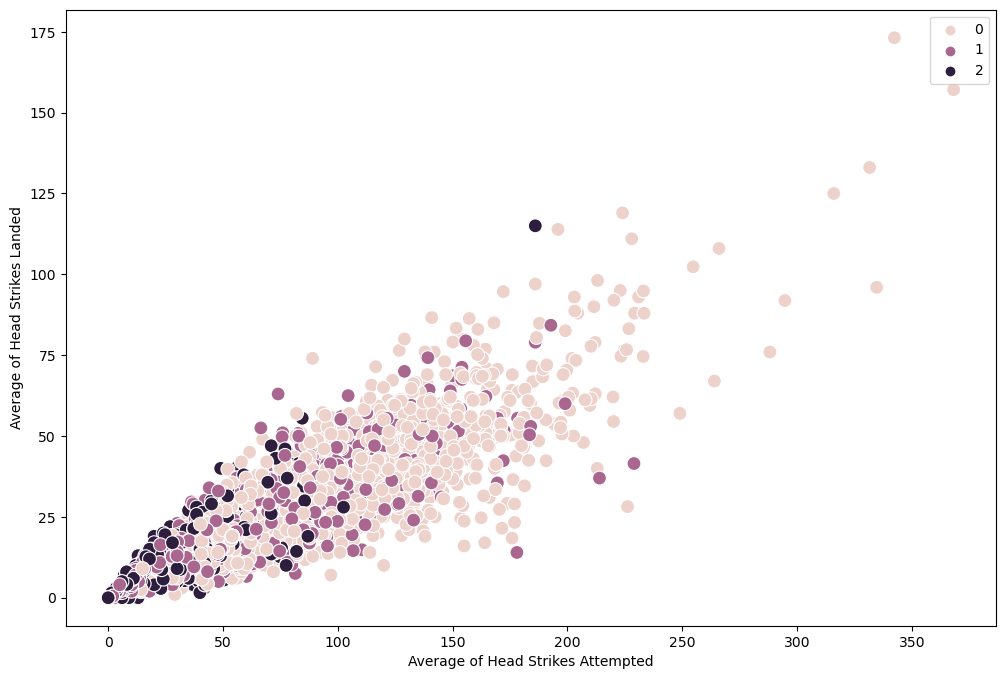

In [39]:
# Plot the clusters for the "R_avg_HEAD_att" and "R_avg_HEAD_landed" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_ufc_4['R_avg_HEAD_att'], y=df_ufc_4['R_avg_HEAD_landed'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Average of Head Strikes Attempted') # Label x-axis.
plt.ylabel('Average of Head Strikes Landed') # Label y-axis.
plt.show()

The plots indicate a positive relationship between "attempted" strikes and strikes "landed." We can confirm our hypothesis the more strikes a fighter attempts, the more strikes are actually landed to his opponent is accurate.

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [32]:
df_ufc_5 = df_ufc_4[['B_wins', 'B_avg_TOTAL_STR_landed', 'R_wins', 'R_avg_TOTAL_STR_landed']].copy()
df_ufc_5

,B_wins,B_avg_TOTAL_STR_landed,R_wins,R_avg_TOTAL_STR_landed
0,1,41.000,1,18.000000
1,2,68.500,4,57.218750
2,0,48.000,4,41.390625
3,0,48.000,0,48.544922
4,4,105.625,5,70.198242
...,...,...,...,...
6007,0,48.000,0,48.544922
6008,0,48.000,0,48.544922
6009,0,48.000,0,48.544922
6010,0,48.000,0,48.544922


In [33]:
columns = ['B_wins', 'B_avg_TOTAL_STR_landed', 'R_wins', 'R_avg_TOTAL_STR_landed']

In [34]:
df_scaled = pd.DataFrame(scaler.fit_transform(df_ufc_5), columns = columns)
df_scaled.head()

,B_wins,B_avg_TOTAL_STR_landed,R_wins,R_avg_TOTAL_STR_landed
0,-0.477845,-0.369236,-0.714111,-1.164317
1,-0.176365,0.619895,0.062945,0.137243
2,-0.779326,-0.117457,0.062945,-0.388048
3,-0.779326,-0.117457,-0.973130,-0.150617
4,0.426596,1.955221,0.321964,0.567997


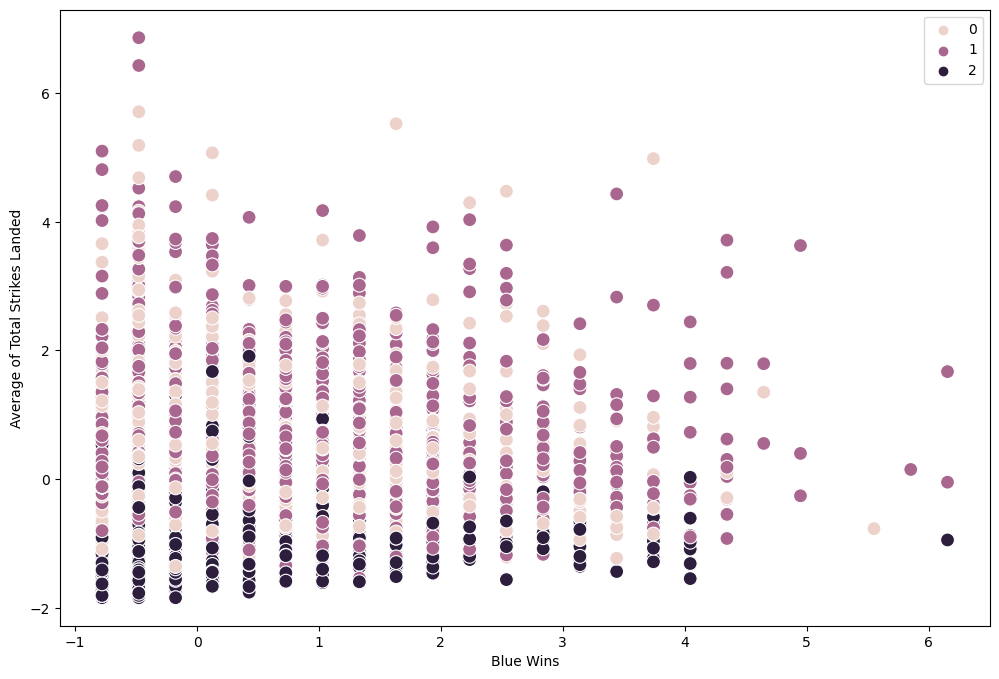

In [35]:
# Plot the clusters for the "B_wins" and "B_avg_TOTAL_STR_landed" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['B_wins'], y=df_scaled['B_avg_TOTAL_STR_landed'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Blue Wins') # Label x-axis.
plt.ylabel('Average of Total Strikes Landed') # Label y-axis.
plt.show()

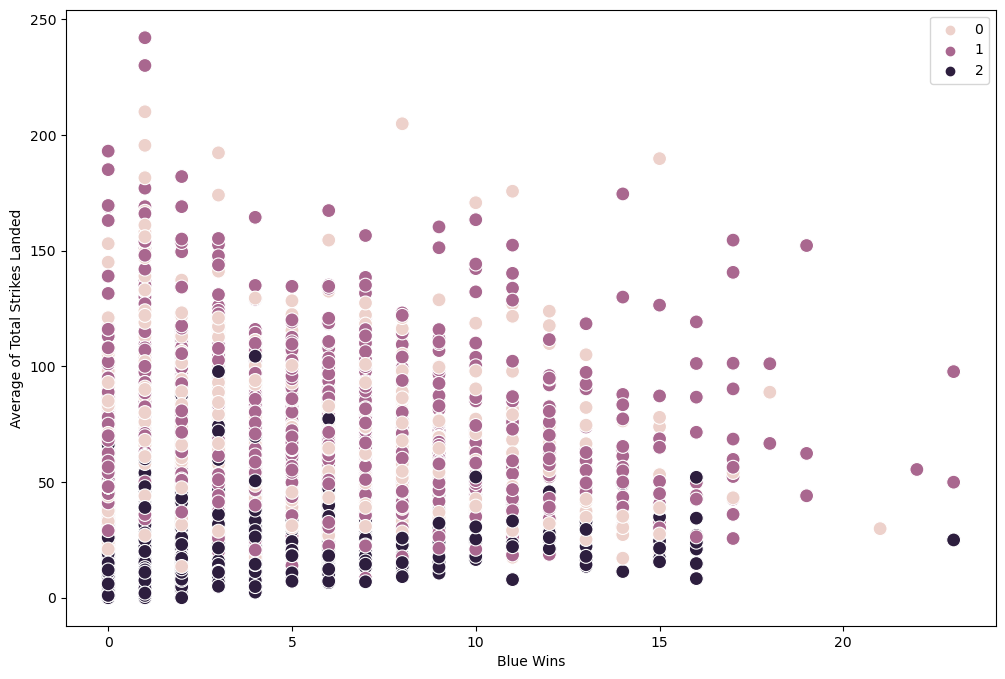

In [29]:
# Plot the clusters for the "B_wins" and "B_avg_TOTAL_STR_landed" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_ufc_4['B_wins'], y=df_ufc_4['B_avg_TOTAL_STR_landed'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Blue Wins') # Label x-axis.
plt.ylabel('Average of Total Strikes Landed') # Label y-axis.
plt.show()

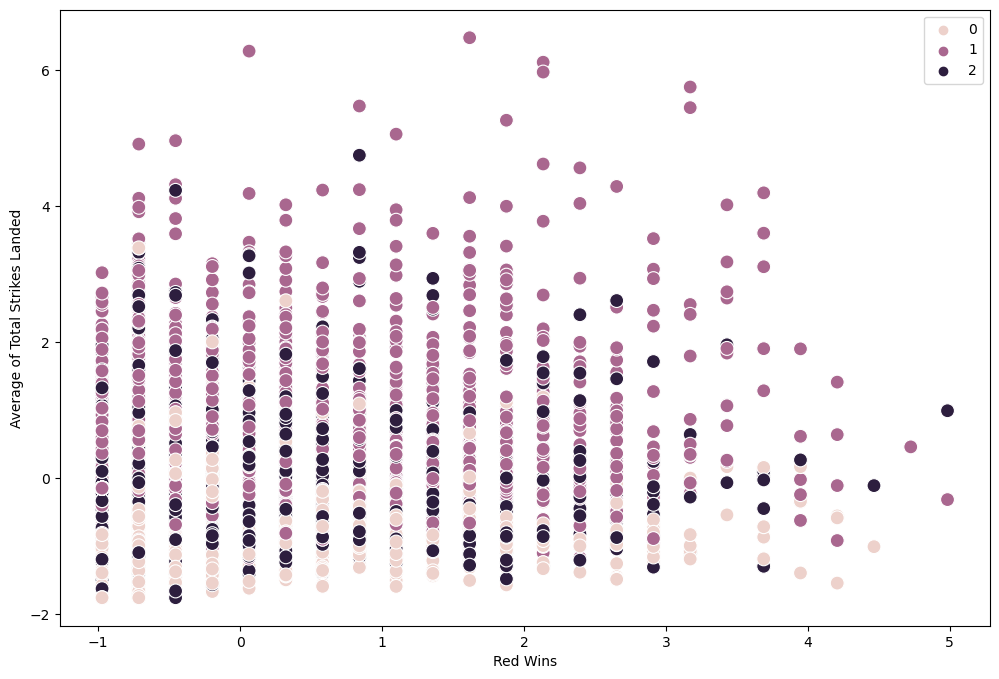

In [36]:
# Plot the clusters for the "R_wins" and "R_avg_TOTAL_STR_landed" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['R_wins'], y=df_scaled['R_avg_TOTAL_STR_landed'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Red Wins') # Label x-axis.
plt.ylabel('Average of Total Strikes Landed') # Label y-axis.
plt.show()

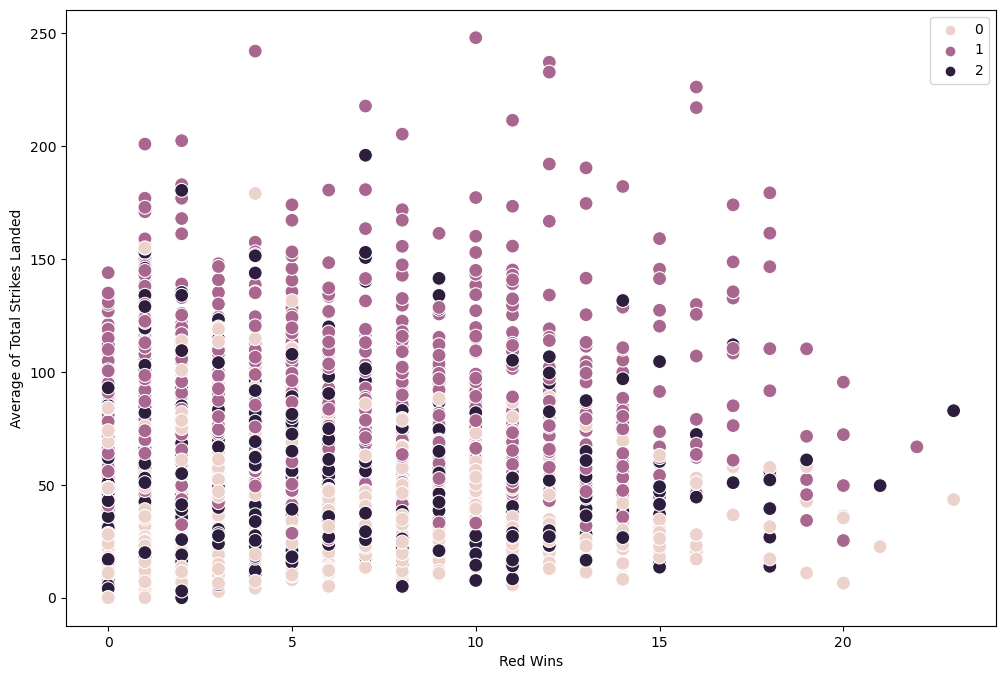

In [47]:
# Plot the clusters for the "R_wins" and "R_avg_TOTAL_STR_landed" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_ufc_4['R_wins'], y=df_ufc_4['R_avg_TOTAL_STR_landed'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Red Wins') # Label x-axis.
plt.ylabel('Average of Total Strikes Landed') # Label y-axis.
plt.show()

There is no relationship between total strikes "landed" and fighter wins. There is no correlation.

In [49]:
df_ufc_4.groupby('cluster').agg({'B_avg_LEG_att':['mean', 'median'],
                         'B_avg_LEG_landed':['mean', 'median'], 
                         'R_avg_LEG_att':['mean', 'median'],
                         'R_avg_LEG_landed':['mean', 'median'], 
                         'B_avg_GROUND_att':['mean', 'median'], 
                         'B_avg_GROUND_landed':['mean', 'median'], 
                         'R_avg_GROUND_att':['mean', 'median'],
                         'R_avg_GROUND_landed':['mean', 'median'], 
                         'B_avg_BODY_att':['mean', 'median'], 
                         'B_avg_BODY_landed':['mean', 'median'],
                         'R_avg_BODY_att':['mean', 'median'],
                         'R_avg_BODY_landed':['mean', 'median']})

B_avg_LEG_att        B_avg_LEG_landed        R_avg_LEG_att  \
                     mean median             mean median          mean   
cluster                                                                  
dark purple      2.757784   2.00         2.172459  1.500      6.133567   
pink             6.474956   4.50         5.193496  3.625      4.355184   
purple           7.725822   4.75         6.140507  3.750     10.247663   

                      R_avg_LEG_landed           B_avg_GROUND_att          \
               median             mean    median             mean  median   
cluster                                                                     
dark purple  4.780975         4.950047  3.937378         5.639344  3.3750   
pink         4.500000         3.494855  3.555527         7.553817  5.0625   
purple       7.992188         8.085274  6.312500         8.355755  5.0625   

            B_avg_GROUND_landed           R_avg_GROUND_att            \
                           mean    median             mean    median   
cluster                                                                
dark purple            3.816875  2.322266         8.630368  5.375000   
pink                   5.092688  3.500000         7.033251  5.375000   
purple                 5.703384  3.500000         9.838993  6.171875   

            R_avg_GROUND_landed         B_avg_BODY_att            \
                           mean  median           mean    median   
cluster                                                            
dark purple            5.805555  3.6875       3.997135  3.000000   
pink                   4.772527  3.6875       9.932725  7.500000   
purple                 6.740253  4.1250      11.367568  7.988701   

            B_avg_BODY_landed           R_avg_BODY_att             \
                         mean    median           mean     median   
cluster                                                             
dark purple          2.844923  2.000000       8.622304   7.843750   
pink                 6.840319  5.076477       6.527720   6.875000   
purple               7.738914  5.363098      14.591105  12.621521   

            R_avg_BODY_landed            
                         mean    median  
cluster                                  
dark purple          6.037834  5.430634  
pink                 4.538461  4.676025  
purple               9.852188  8.491211

The best-rated cluster (purple) has a higher median than the second best (pink) and third best (dark purple).